In [1]:
!pip install tensorflow-gpu


  Using cached tensorflow-gpu-2.12.0.tar.gz (2.6 kB)
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [44 lines of output]
      Traceback (most recent call last):
        File "/Users/bisialgoruthm/miniconda3/lib/python3.11/site-packages/setuptools/_vendor/packaging/requirements.py", line 35, in __init__
          parsed = _parse_requirement(requirement_string)
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/Users/bisialgoruthm/miniconda3/lib/python3.11/site-packages/setuptools/_vendor/packaging/_parser.py", line 64, in parse_requirement
          return _parse_requirement(Tokenizer(source, rules=DEFAULT_RULES))
                 ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
        File "/Users/bisialgoruthm/miniconda3/lib/python3.11/site-packages/setuptools/_vendor/packaging/_parser.py", line 82, in _parse_requirement
          url, spe

In [2]:
!pip list

Package                      Version
---------------------------- ------------
absl-py                      2.1.0
appnope                      0.1.3
archspec                     0.2.1
asgiref                      3.7.2
asttokens                    2.4.1
astunparse                   1.6.3
boltons                      23.0.0
Bottleneck                   1.3.5
Brotli                       1.0.9
CacheControl                 0.13.1
cachetools                   5.3.2
certifi                      2023.11.17
cffi                         1.15.1
charset-normalizer           2.0.4
comm                         0.1.4
conda                        23.10.0
conda-content-trust          0.2.0
conda-libmamba-solver        23.11.1
conda-package-handling       2.2.0
conda_package_streaming      0.9.0
contourpy                    1.2.0
cryptography                 41.0.3
cycler                       0.12.1
debugpy                      1.6.7
decorator                    5.1.1
Django                       5.0

In [1]:
import firebase_admin
import tensorflow as tf
import os
from matplotlib import pyplot as plt 


In [3]:

from firebase_admin import credentials

cred = credentials.Certificate("serviceAccountKey.json")
firebase_admin.initialize_app(cred)


In [18]:
#Limit GPU usage to avoid OOM error
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.experimental.set_memory_growth(gpu, True)

Now, we can import Open CV and image hdr to re

In [17]:
import cv2
import imghdr

In [4]:
data_dir = 'data'

In [5]:
image_exts = ['jpeg', 'jpg', 'dmp', 'png']

In [19]:
os.listdir(os.path.join(data_dir))

['dogs', 'cats']

In [20]:
#Check the file extensions to make sure they are compatible with open cv

for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)

        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)

            if tip not in image_exts:
                print('Image not found in ', image_path)
                os.remove(image_path)

        except Exception as e:
            print('Issue with image', e)


libpng warning: iCCP: known incorrect sRGB profile


Remove dodgy images  

In [ ]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

(1200, 1200, 3)

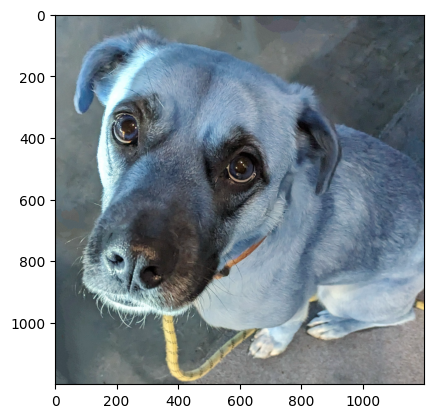

In [21]:
pic = cv2.imread(os.path.join(data_dir, 'dogs', '_20231219_on_dark_eyed_dogs_1200.jpg'))
plt.imshow(pic)
pic.shape

In [15]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [22]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 385 files belonging to 2 classes.


In [23]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [24]:
batch = data_iterator.next()

#Image as numpy array 
batch[0].shape

(32, 256, 256, 3)

2024-02-01 09:43:19.725825: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


In [25]:
#Batch labels
batch[1]

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1], dtype=int32)

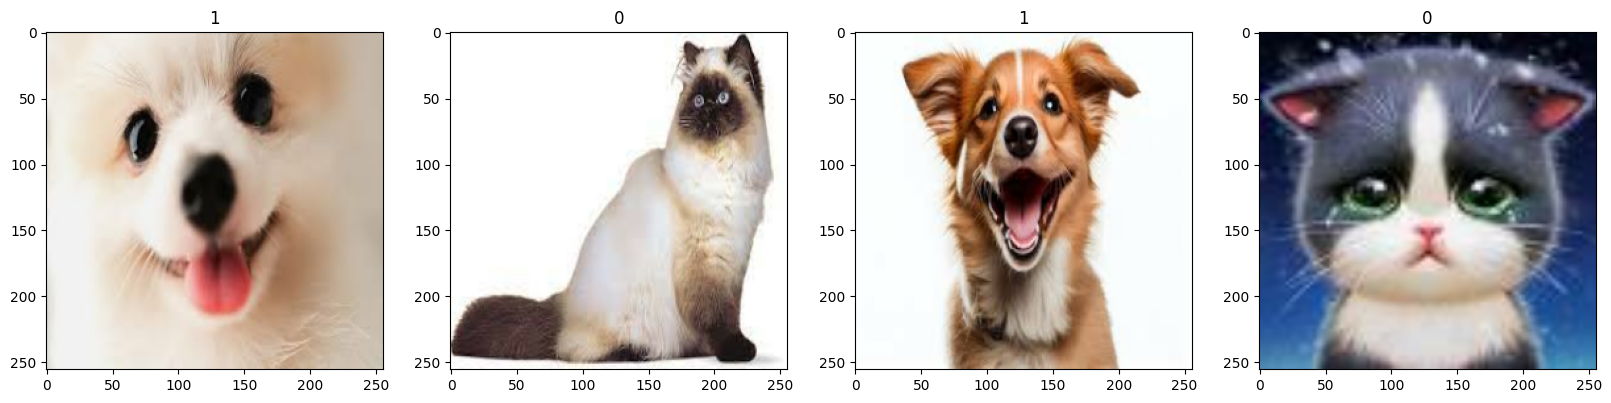

In [26]:
#DOG: 1 CAT: 2
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])



In [27]:
batch[0].shape
#We have 32 images of size 256 by 256 with theree channels(rgb)

(32, 256, 256, 3)

# Preprocessing

Now that we have loaded our data, we can standardize our images by scaling them in the range of `0 - 1`, instead of the original `0 - 255`. This process aids our model in generalizing faster and producing better results. Additionally, we will split our data into `training`, `testing`, and `validation` sets to mitigate the risk of overfitting.


Scale Data

In [28]:
data = data.map(lambda x, y: (x/255, y))

Split Data

In [29]:
len(data)

13

In [30]:
train_size = int(len(data) * .7)
val_size = int(len(data) * .2) +  1
test_size = int(len(data) * .1) 

In [31]:
train_size + test_size + val_size

13

In [32]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Building the Deep Learning Model 
We will bw using the keras sequential API

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

# CNN Layers and Image classification architecture 

- **Convo 2D**: This adds a 2D convolutional Neural network which performs element-wise multiplication over 2D input data.

- **MaxPooling2D**: This reduces the spatial dimensions of the data by choosing the largest element within each pooling window. It helps to detect the most prominent features such as edges, corners, and textures which will be instrumental in the classification process. It is beneficial for object recognition, where the position of the object may vary.

- **Dense**: This is a very simple layer of neurons that perform linear operations. This means that this layer uses linear operations to compute every output from a given input. It is deeply connected to the previous layer.

- **Flatten**: This flattens the dense layer into a 1D array to input into the next layer. It's a crucial component of our CNNs. It is then used to transition from the convolutional layer to the fully connected layer.

## Activation Functions

- **ReLu (Rectified Linear Unit)**: This converts all negative outputs to 0 while preserving all positives.

- **Sigmoid**: This maps real values to a number between 0 and 1.


In [34]:
model = Sequential()
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256, 3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [35]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 32)        0

Model Training
Its time to feed data into our neural network. This is where the learning begins.

In [37]:
logsdir = 'logs'
#This logs the model as it trains
tensor_callback = tf.keras.callbacks.TensorBoard(log_dir=logsdir) 

In [38]:
#Fit
hist = model.fit(train, epochs=25, validation_data=val, callbacks=[tensor_callback])

Epoch 1/25
1/9 [==>...........................] - ETA: 18s - loss: 0.7064 - accuracy: 0.4375

2024-02-01 09:49:30.666990: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 1.0145 - accuracy: 0.5174

2024-02-01 09:49:35.025641: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 8s 681ms/step - loss: 1.0145 - accuracy: 0.5174 - val_loss: 0.7322 - val_accuracy: 0.5417
Epoch 2/25
1/9 [==>...........................] - ETA: 15s - loss: 0.7140 - accuracy: 0.5938

2024-02-01 09:49:38.058791: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.6603 - accuracy: 0.6215

2024-02-01 09:49:42.398240: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 7s 679ms/step - loss: 0.6603 - accuracy: 0.6215 - val_loss: 0.5803 - val_accuracy: 0.7083
Epoch 3/25
1/9 [==>...........................] - ETA: 15s - loss: 0.6400 - accuracy: 0.6250

2024-02-01 09:49:45.443904: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.6075 - accuracy: 0.6771

2024-02-01 09:49:49.681324: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 7s 666ms/step - loss: 0.6075 - accuracy: 0.6771 - val_loss: 0.5741 - val_accuracy: 0.6458
Epoch 4/25
1/9 [==>...........................] - ETA: 15s - loss: 0.5947 - accuracy: 0.5938

2024-02-01 09:49:52.712613: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.5438 - accuracy: 0.7222

2024-02-01 09:49:56.954451: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 7s 667ms/step - loss: 0.5438 - accuracy: 0.7222 - val_loss: 0.4549 - val_accuracy: 0.8021
Epoch 5/25
1/9 [==>...........................] - ETA: 15s - loss: 0.4148 - accuracy: 0.8750

2024-02-01 09:50:00.024869: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.4463 - accuracy: 0.8056

2024-02-01 09:50:04.291815: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 7s 673ms/step - loss: 0.4463 - accuracy: 0.8056 - val_loss: 0.3511 - val_accuracy: 0.8646
Epoch 6/25
1/9 [==>...........................] - ETA: 15s - loss: 0.4002 - accuracy: 0.8438

2024-02-01 09:50:07.353576: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.3525 - accuracy: 0.8854

2024-02-01 09:50:11.645560: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 7s 674ms/step - loss: 0.3525 - accuracy: 0.8854 - val_loss: 0.2357 - val_accuracy: 0.9167
Epoch 7/25
1/9 [==>...........................] - ETA: 15s - loss: 0.2651 - accuracy: 0.9375

2024-02-01 09:50:14.707184: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.2572 - accuracy: 0.9062

2024-02-01 09:50:18.925021: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 7s 665ms/step - loss: 0.2572 - accuracy: 0.9062 - val_loss: 0.1711 - val_accuracy: 0.9479
Epoch 8/25
1/9 [==>...........................] - ETA: 15s - loss: 0.1403 - accuracy: 0.9688

2024-02-01 09:50:21.974338: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.1632 - accuracy: 0.9549

2024-02-01 09:50:26.353367: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 7s 685ms/step - loss: 0.1632 - accuracy: 0.9549 - val_loss: 0.1264 - val_accuracy: 0.9583
Epoch 9/25
1/9 [==>...........................] - ETA: 15s - loss: 0.1654 - accuracy: 0.9375

2024-02-01 09:50:29.408542: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.1171 - accuracy: 0.9583

2024-02-01 09:50:33.672277: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 7s 671ms/step - loss: 0.1171 - accuracy: 0.9583 - val_loss: 0.0869 - val_accuracy: 0.9896
Epoch 10/25
1/9 [==>...........................] - ETA: 15s - loss: 0.0523 - accuracy: 0.9688

2024-02-01 09:50:36.740957: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0590 - accuracy: 0.9861

2024-02-01 09:50:40.997278: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 7s 670ms/step - loss: 0.0590 - accuracy: 0.9861 - val_loss: 0.0894 - val_accuracy: 0.9792
Epoch 11/25
1/9 [==>...........................] - ETA: 15s - loss: 0.0242 - accuracy: 1.0000

2024-02-01 09:50:44.025525: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0661 - accuracy: 0.9896

2024-02-01 09:50:48.313158: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 7s 672ms/step - loss: 0.0661 - accuracy: 0.9896 - val_loss: 0.0271 - val_accuracy: 1.0000
Epoch 12/25
1/9 [==>...........................] - ETA: 15s - loss: 0.0443 - accuracy: 0.9688

2024-02-01 09:50:51.386281: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0686 - accuracy: 0.9792

2024-02-01 09:50:55.619190: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 7s 669ms/step - loss: 0.0686 - accuracy: 0.9792 - val_loss: 0.0380 - val_accuracy: 1.0000
Epoch 13/25
1/9 [==>...........................] - ETA: 15s - loss: 0.0401 - accuracy: 1.0000

2024-02-01 09:50:58.667491: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0441 - accuracy: 0.9931

2024-02-01 09:51:02.932477: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 7s 671ms/step - loss: 0.0441 - accuracy: 0.9931 - val_loss: 0.0334 - val_accuracy: 1.0000
Epoch 14/25
1/9 [==>...........................] - ETA: 15s - loss: 0.0374 - accuracy: 1.0000

2024-02-01 09:51:05.997102: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0324 - accuracy: 0.9896

2024-02-01 09:51:10.273498: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 7s 673ms/step - loss: 0.0324 - accuracy: 0.9896 - val_loss: 0.0166 - val_accuracy: 1.0000
Epoch 15/25
1/9 [==>...........................] - ETA: 15s - loss: 0.0067 - accuracy: 1.0000

2024-02-01 09:51:13.338018: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0169 - accuracy: 0.9965

2024-02-01 09:51:17.627486: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 7s 674ms/step - loss: 0.0169 - accuracy: 0.9965 - val_loss: 0.0171 - val_accuracy: 0.9896
Epoch 16/25
1/9 [==>...........................] - ETA: 15s - loss: 0.0157 - accuracy: 1.0000

2024-02-01 09:51:20.706189: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0182 - accuracy: 1.0000

2024-02-01 09:51:25.061636: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 7s 680ms/step - loss: 0.0182 - accuracy: 1.0000 - val_loss: 0.0138 - val_accuracy: 1.0000
Epoch 17/25
1/9 [==>...........................] - ETA: 15s - loss: 0.0149 - accuracy: 1.0000

2024-02-01 09:51:28.103967: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0125 - accuracy: 1.0000

2024-02-01 09:51:32.388625: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 7s 673ms/step - loss: 0.0125 - accuracy: 1.0000 - val_loss: 0.0089 - val_accuracy: 1.0000
Epoch 18/25
1/9 [==>...........................] - ETA: 15s - loss: 0.0129 - accuracy: 1.0000

2024-02-01 09:51:35.457910: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0112 - accuracy: 0.9965

2024-02-01 09:51:39.724231: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 7s 670ms/step - loss: 0.0112 - accuracy: 0.9965 - val_loss: 0.0040 - val_accuracy: 1.0000
Epoch 19/25
1/9 [==>...........................] - ETA: 15s - loss: 6.9400e-04 - accuracy: 1.0000

2024-02-01 09:51:42.772171: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0049 - accuracy: 1.0000

2024-02-01 09:51:47.081046: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 7s 677ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 20/25
1/9 [==>...........................] - ETA: 15s - loss: 0.0026 - accuracy: 1.0000

2024-02-01 09:51:50.168818: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 1.0000

2024-02-01 09:51:54.451939: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 7s 673ms/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 9.6390e-04 - val_accuracy: 1.0000
Epoch 21/25
1/9 [==>...........................] - ETA: 15s - loss: 0.0041 - accuracy: 1.0000

2024-02-01 09:51:57.525040: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 1.0000

2024-02-01 09:52:01.804213: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 7s 673ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 9.0557e-04 - val_accuracy: 1.0000
Epoch 22/25
1/9 [==>...........................] - ETA: 15s - loss: 9.6439e-04 - accuracy: 1.0000

2024-02-01 09:52:04.896127: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 9.9598e-04 - accuracy: 1.0000

2024-02-01 09:52:09.152896: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 7s 671ms/step - loss: 9.9598e-04 - accuracy: 1.0000 - val_loss: 4.0408e-04 - val_accuracy: 1.0000
Epoch 23/25
1/9 [==>...........................] - ETA: 15s - loss: 1.3454e-04 - accuracy: 1.0000

2024-02-01 09:52:12.221813: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 7.4311e-04 - accuracy: 1.0000

2024-02-01 09:52:16.494346: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 7s 674ms/step - loss: 7.4311e-04 - accuracy: 1.0000 - val_loss: 4.5093e-04 - val_accuracy: 1.0000
Epoch 24/25
1/9 [==>...........................] - ETA: 15s - loss: 8.2400e-04 - accuracy: 1.0000

2024-02-01 09:52:19.556112: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 6.0594e-04 - accuracy: 1.0000

2024-02-01 09:52:23.867058: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 7s 676ms/step - loss: 6.0594e-04 - accuracy: 1.0000 - val_loss: 4.7380e-04 - val_accuracy: 1.0000
Epoch 25/25
1/9 [==>...........................] - ETA: 15s - loss: 1.8664e-04 - accuracy: 1.0000

2024-02-01 09:52:26.937433: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - ETA: 0s - loss: 4.0969e-04 - accuracy: 1.0000

2024-02-01 09:52:31.239323: W tensorflow/core/lib/png/png_io.cc:88] PNG warning: iCCP: known incorrect sRGB profile


9/9 [==============================] - 7s 677ms/step - loss: 4.0969e-04 - accuracy: 1.0000 - val_loss: 2.8017e-04 - val_accuracy: 1.0000


In [40]:
hist.history

{'loss': [1.0145152807235718,
  0.6602704524993896,
  0.607547402381897,
  0.5438100099563599,
  0.44627177715301514,
  0.3524743318557739,
  0.25716349482536316,
  0.16321194171905518,
  0.11707901954650879,
  0.05903790891170502,
  0.06607887148857117,
  0.06861818581819534,
  0.04405861720442772,
  0.032446011900901794,
  0.016907088458538055,
  0.018241874873638153,
  0.012490283697843552,
  0.011194351129233837,
  0.004907372873276472,
  0.004279918037354946,
  0.0019596873316913843,
  0.0009959795279428363,
  0.0007431072881445289,
  0.0006059427978470922,
  0.0004096905468031764],
 'accuracy': [0.5173611044883728,
  0.6215277910232544,
  0.6770833134651184,
  0.7222222089767456,
  0.8055555820465088,
  0.8854166865348816,
  0.90625,
  0.9548611044883728,
  0.9583333134651184,
  0.9861111044883728,
  0.9895833134651184,
  0.9791666865348816,
  0.9930555820465088,
  0.9895833134651184,
  0.9965277910232544,
  1.0,
  1.0,
  0.9965277910232544,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1

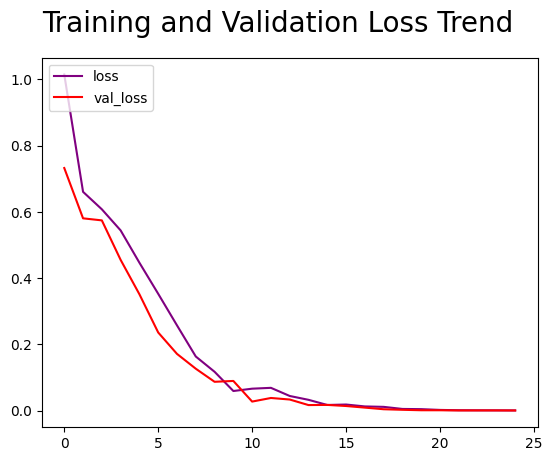

In [43]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='purple', label='loss')
plt.plot(hist.history['val_loss'], color='red', label='val_loss')
fig.suptitle('Training and Validation Loss Trend ', fontsize=20)
plt.legend(loc='upper left')
plt.show()

We can see that the loss and validation reduced steadily as expected. This signifies 